In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
ab_pos = pd.read_csv('variable_results/abnormal_positive_ratio.csv')
ab_neg = pd.read_csv('variable_results/abnormal_negative_ratio.csv')
pos = pd.read_csv('variable_results/positive_ratio.csv')
neg = pd.read_csv('variable_results/negative_ratio.csv')

variables = ['NR', 'ABNR', 'PR', 'ABPR']
ab_pos = ab_pos.set_index('Date')
ab_pos_lag = ab_pos[ab_pos.index <= '2021-12-31']
ab_pos_lead = ab_pos.iloc[1:(len(ab_pos_lag)+1)]

ab_neg = ab_neg.set_index('Date')
ab_neg_lag = ab_neg[ab_neg.index <= '2021-12-31']
ab_neg_lead = ab_neg.iloc[1:(len(ab_neg_lag)+1)]

pos = pos.set_index('Date')
pos_lag = pos[pos.index <= '2021-12-31']
pos_lead = pos.iloc[1:(len(pos_lag)+1)]

neg = neg.set_index('Date')
neg_lag = neg[neg.index <= '2021-12-31']
neg_lead = neg.iloc[1:(len(neg_lag)+1)]

ab_pos_means = ab_pos_lag.mean()
ab_neg_means = ab_neg_lag.mean()
pos_means = pos_lag.mean()
neg_means = neg_lag.mean()

def summary_stats(df):
    
    column_stats = df.describe().loc[['mean', '50%', 'min', 'max', 'std']]
    column_stats.index = ['Mean', 'Median', 'Min', 'Max', 'SD']
    column_stats = column_stats.transpose()
    
    return column_stats

summary_stats = pd.concat([summary_stats(neg_means), summary_stats(ab_neg_means), summary_stats(pos_means), summary_stats(ab_pos_means)], keys = variables, axis=1).transpose()
summary_stats.to_csv('summary statistic/table1.csv')

ab_pos_means_df = pd.DataFrame(ab_pos_means, columns=['ABPR'])
ab_neg_means_df = pd.DataFrame(ab_neg_means, columns=['ABNR'])
pos_means_df = pd.DataFrame(pos_means, columns=['PR'])
neg_means_df = pd.DataFrame(neg_means, columns=['NR'])

lead_ab_pos_means_df = pd.DataFrame(ab_pos_lead.mean(), columns=['Lead_ABPR'])
lead_ab_neg_means_df = pd.DataFrame(ab_neg_lead.mean(), columns=['Lead_ABNR'])
lead_pos_means_df = pd.DataFrame(pos_lead.mean(), columns=['Lead_R'])
lead_neg_means_df = pd.DataFrame(neg_lead.mean(), columns=['Lead_NR'])

data_df = pd.concat([neg_means_df, ab_neg_means_df, pos_means_df, ab_pos_means_df, lead_neg_means_df, lead_ab_neg_means_df, lead_pos_means_df, lead_ab_pos_means_df], axis=1)
correlation_matrix = data_df.corr()
correlation_matrix.to_csv('summary statistic/table2.csv')

In [ ]:
ab_rolling  = []
reg_rolling  = []

cols = pos.columns
colnames = []

for ticker in cols:
        ab_rolling.append((ab_pos[ticker]).rolling(3).corr(ab_neg[ticker]))
        reg_rolling.append((pos[ticker]).rolling(3).corr(neg[ticker]))
        colnames.append(ticker)

ab_rolling = pd.DataFrame(data = ab_rolling)
reg_rolling = pd.DataFrame(data = reg_rolling)

ab_rolling = ab_rolling.transpose()
reg_rolling = reg_rolling.transpose()

ab_rolling.columns = colnames
reg_rolling.columns = colnames

In [ ]:
ab_rolling_descrip = []
reg_rolling_descrip = []

for ticker in ab_rolling:
    ab_rolling_descrip.append(ab_rolling[ticker].describe())
    reg_rolling_descrip.append(reg_rolling[ticker].describe())

ab_rolling_descrip = pd.DataFrame(data = ab_rolling_descrip)
reg_rolling_descrip = pd.DataFrame(data = reg_rolling_descrip)

ab_rolling_descrip = ab_rolling_descrip.transpose()
reg_rolling_descrip = reg_rolling_descrip.transpose()

ab_rolling_descrip.columns = ab_rolling.columns
reg_rolling_descrip.columns = reg_rolling.columns

ab_rolling_descrip = ab_rolling_descrip.transpose()
reg_rolling_descrip = reg_rolling_descrip.transpose()

Text(0.5, 0.98, 'Abnormal Ratio Rolling 90-Day Correlation')

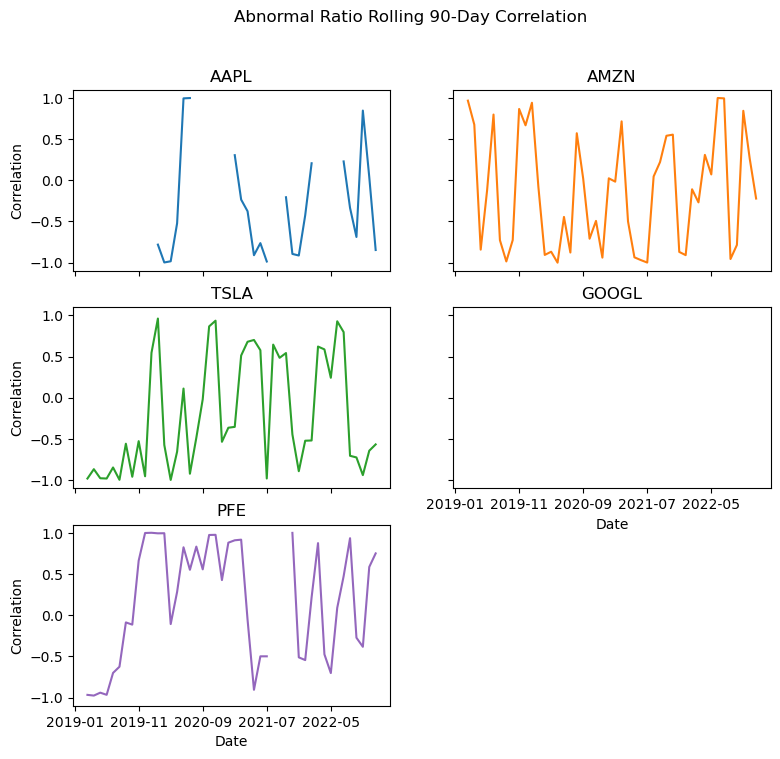

In [ ]:
ab_rolling.plot(subplots=True, figsize = (9, 8), layout = (3, 2), legend = False, 
             title = colnames, xlabel = 'Date', ylabel = 'Correlation', sharey = True)
plt.suptitle('Abnormal Ratio Rolling 90-Day Correlation')

Text(0.5, 0.98, 'Regular Ratio Rolling 90-Day Correlation')

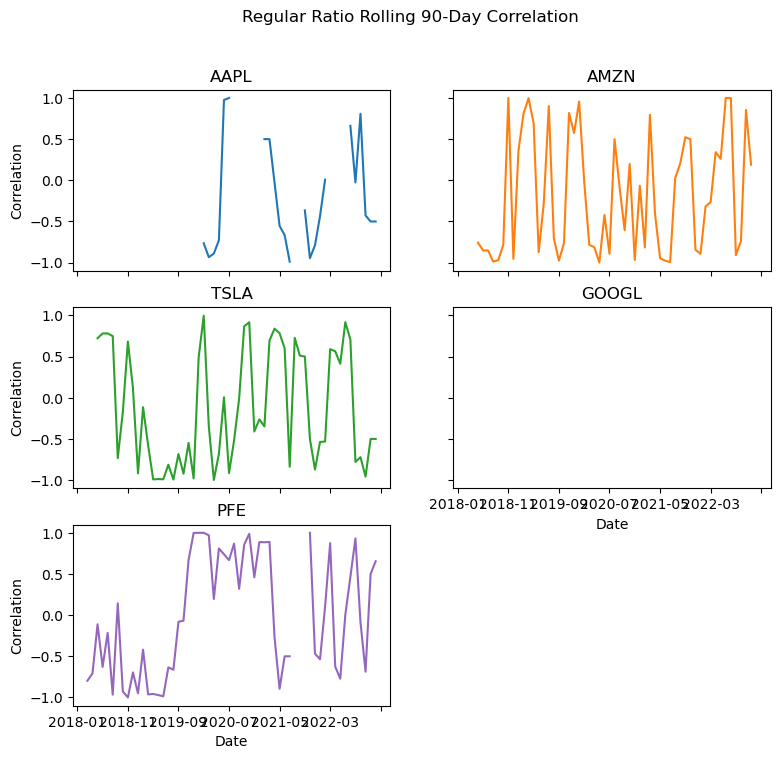

In [ ]:
reg_rolling.plot(subplots=True, figsize = (9, 8), layout = (3, 2), legend = False, 
             title = colnames, xlabel = 'Date', ylabel = 'Correlation', sharey = True)
plt.suptitle('Regular Ratio Rolling 90-Day Correlation')